# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Gabriel Moya

* __Rol__: 201710531-3

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
#agregue seaborn para facilitar los graficos
%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
#Primero veamos si existen datos vacios en el data frame, lo haremos por columnas dado que son menos.
aux = []
c = 0
for col in digits.columns:
    vacios = digits[col][digits[col].isna()]
    c = c + len(vacios)
print("La cantidad de elementos vacios es",c)
    

La cantidad de elementos vacios es 0


In [7]:
#Luego veamos la cantidad distinta de Targets que hay su tipo de dato, y luego veamoslo en un grafico
digits["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Como se puede ver estan bien definidos y tienen el formato de int de integer.

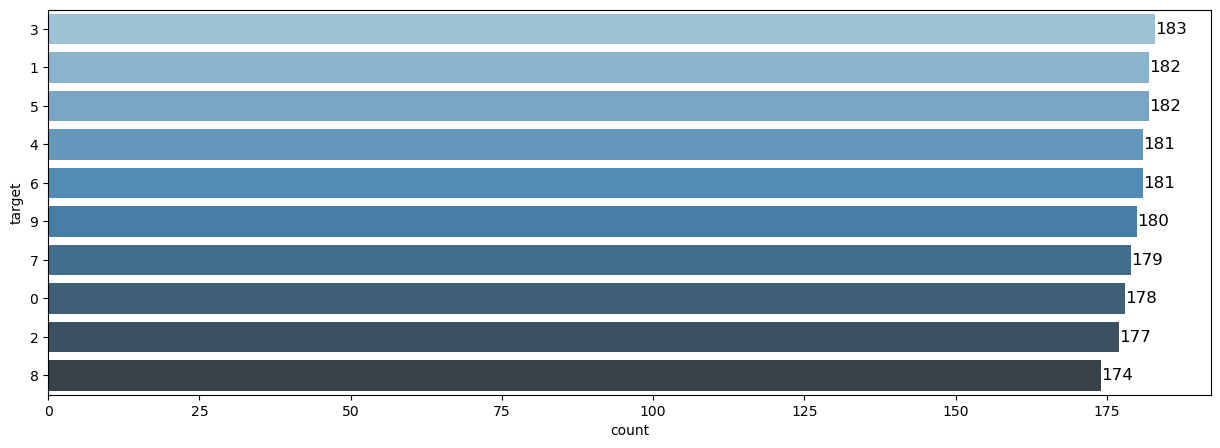

In [8]:
plt.style.use("default")
plt.figure(figsize=(15,5))
contador_grafo = sns.countplot(
    y = "target",
    data = digits,
    order = digits["target"].value_counts().index,
    #obviamente usamos azul porque la U es lo mas grande.
    palette = "Blues_d",
    linewidth = 3
)
for cont in contador_grafo.containers:
    contador_grafo.bar_label(cont,fontsize=12)
plt.show()    

Como se puede ver hay unos numeros que se repiten mas que otros, pero no hay anormalidades. Tal vez esto indique que es mas facil reconocer el numero 8 (Que se repite 174 veces), que el numero 3 (Que tiene 183 variantes).

In [9]:
list_max = []
list_min = []
for columna in digits:
    list_max.append(digits[columna].max())
    list_min.append(digits[columna].min())
maximo = max(list_max)
minimo = max(list_min)
print("\nEl dato mas grande es: ",maximo)
print("\nEl dato mas pequeño es: ", minimo)


El dato mas grande es:  16

El dato mas pequeño es:  0


Como podemos ver todos los datos estan entre los rangos que se mencionan, es decir, no hay ninguno bajo 0 y ninguno sobre 255.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [10]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

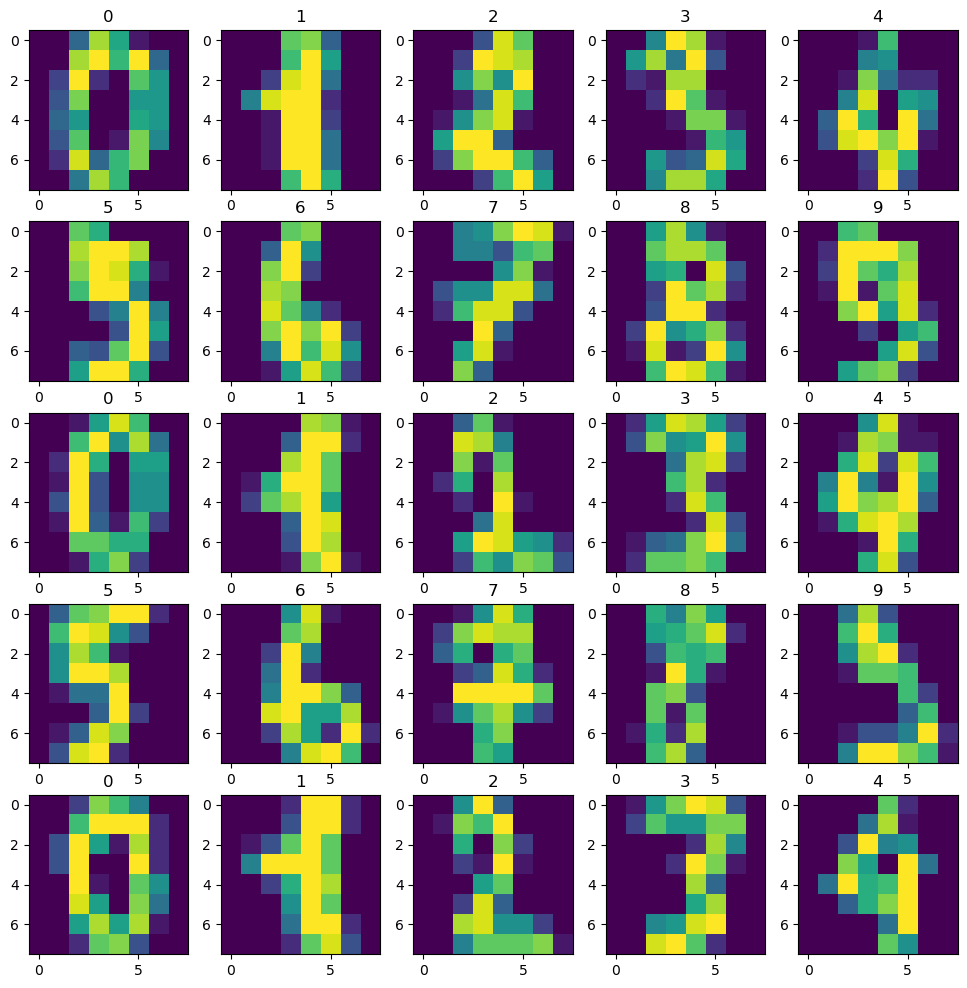

In [11]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
c = 0
for i in range(0,5):
    for e in range(0,5):
        axs[i,e].imshow(digits_dict["images"][c])
        axs[i,e].set_title(digits["target"][c])
        c = c+1;

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [12]:
from sklearn.model_selection import train_test_split

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("\nEl largo del conjunto de entrenamiento es: ", len(y_train))
print("\nEl largo del conjunto de testeo es: ", len(y_test))



El largo del conjunto de entrenamiento es:  1437

El largo del conjunto de testeo es:  360


1) Luego empezamos por le modelo de regrecion logistica.

In [13]:
from sklearn.linear_model import LogisticRegression

rlog = LogisticRegression()
rlog.fit(X_train, y_train)

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Luego grafiquemos la matriz de confusion.

In [14]:
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true = list(y_test)
y_pred = list(rlog.predict(X_test))

print("Valores: \n")
print("Originales: ", y_true)
print("\nPredicho: ", y_pred)

Valores: 

Originales:  [6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0, 6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5, 5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 5, 0, 5, 2, 1, 3, 1, 4, 1, 1, 7, 0, 1, 5, 2, 1, 2, 8, 7, 

Es dificil verlo, asi que veamos la metriz de confusion.

In [15]:
print("La matriz de confusion es: ")
print(confusion_matrix(y_true,y_pred))

La matriz de confusion es: 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


Como se puede ver, es una muy buena aproximacion.

Y finalmente vemos las metricas.

In [16]:
df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_pred
    }
)
df_metrics = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metrics

Metricas para el regresor X con los arreglos correspondientes a los numeros.


,accuracy,recall,precision,fscore
0,0.9694,0.9722,0.9709,0.9714


Podemos ver que tiene una prediccion muy buena y no depende de hiperparametros.

2) Ahora vemos el metodo "K-nearest-neighbors", empezamos seleccionando el conjunto de testeo y entrenamiento.

In [17]:
X = digits.drop(columns="target")
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("\nEl largo del conjunto de entrenamiento es: ", len(y_train))
print("\nEl largo del conjunto de testeo es: ", len(y_test))


El largo del conjunto de entrenamiento es:  1437

El largo del conjunto de testeo es:  360


Luego instanciamos el modelo objetivo.

In [18]:
from sklearn import neighbors

reg_knn = neighbors.KNeighborsRegressor(5,weights = "uniform")

reg_knn.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(reg_knn.predict(X_test))

print("Valores: \n")
print("Originales: ", y_true)
print("\nPredicho: ", y_pred)

Valores: 

Originales:  [6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0, 6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5, 5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7, 7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 5, 0, 5, 2, 1, 3, 1, 4, 1, 1, 7, 0, 1, 5, 2, 1, 2, 8, 7, 

Luego para comparar mejor los resultados vemos la matriz de confusion, y como se ve hay que cambiar los elementos de 
y_pred de float a int.

In [19]:
y_preds = [int(x) for x in y_pred]
print("La matriz de confusion es: ")
print(confusion_matrix(y_true,y_preds))

La matriz de confusion es: 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  2  0  0  0  0  0]
 [ 0  0  1  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  1  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  1  0]
 [ 0  0  0  0  0  2  1  0 27  0]
 [ 0  0  0  0  0  2  1  2  4 31]]


Como se puede ver la diagonal es la mas poblada, por lo que hay buena convergencia. Veamos las metricas.

In [20]:
y_preds = [int(x) for x in y_pred]
df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)
df_metrics_2 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors")]
df_metricas

Metricas para el regresor X con los arreglos correspondientes a los numeros.


,accuracy,recall,precision,fscore,modelo
0,0.9694,0.9722,0.9709,0.9714,Regresion logistica
0,0.9472,0.9479,0.9507,0.9473,K-nearest-neighbors


Como se puede ver entre los 2 es mejor la regrecion lineal. Pero como se puede ver, el Knn tiene hiperparametros. 
Usemos GridSearchCV para ver cuales son los mejores parametros.

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = digits.iloc[:,:64].values
y = digits.iloc[:,8] .values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn_model = neighbors.KNeighborsRegressor()

search = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
}

GS = GridSearchCV(estimator=knn_model,
                  param_grid=search,
                  scoring = summary_metrics,
                  cv=5,
                  verbose=4
)
GS.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=3;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END ......................n_neighbors=10;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=<function summary_metrics at 0x7f0327032310>, verbose=4)

In [22]:

print(GS.best_params_)

{'n_neighbors': 1}


Ahora probemos con n_neighbors = 1

Luego apliquemos el modelo de nuevo usando 7 vecinos

In [23]:
reg_knn = neighbors.KNeighborsRegressor(n_neighbors = 1,weights = "uniform")

X = digits.drop(columns="target")
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

reg_knn.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(reg_knn.predict(X_test))
y_preds = [int(x) for x in y_pred]

df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)

df_metrics_3 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("n_neighbors = 1")]
df_metricas

Metricas para el regresor X con los arreglos correspondientes a los numeros.


,accuracy,recall,precision,fscore,modelo
0,0.9694,0.9722,0.9709,0.9714,Regresion logistica
0,0.9472,0.9479,0.9507,0.9473,K-nearest-neighbors
0,0.9778,0.9786,0.9783,0.9781,n_neighbors = 1


Como se puede ver con n_neighbors = 1, el modelo K-nearest-neighbors es mejor que la regresion lineal en todas las 4
metricas.

Finalmente se tiene que usar un modelo cualquiera, Veamos una regresion usando un arbol de decicion.

In [24]:
from sklearn import tree

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(clf.predict(X_test))
y_preds = [int(x) for x in y_pred]

df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)

df_metrics_4 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3,df_metrics_4])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("n_neighbors = 1"),("DecisionTreeRegressor")]
df_metricas



Metricas para el regresor X con los arreglos correspondientes a los numeros.


,accuracy,recall,precision,fscore,modelo
0,0.9694,0.9722,0.9709,0.9714,Regresion logistica
0,0.9472,0.9479,0.9507,0.9473,K-nearest-neighbors
0,0.9778,0.9786,0.9783,0.9781,n_neighbors = 1
0,0.8611,0.8613,0.8688,0.8625,DecisionTreeRegressor


Podemos ver que es la peor metrica, veamos la matriz de confusion.

In [25]:
print("La matriz de confusion es: ")
print(confusion_matrix(y_true,y_preds))

La matriz de confusion es: 
[[28  0  1  1  0  1  0  0  2  0]
 [ 0 27  0  0  0  0  0  0  0  1]
 [ 0  0 28  3  0  1  0  0  0  1]
 [ 0  0  0 28  0  0  0  0  2  4]
 [ 0  2  0  0 40  2  1  1  0  0]
 [ 0  1  0  0  2 41  2  0  1  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  1  3  1  0  0 26  0  3]
 [ 0  1  1  0  0  1  2  0 24  1]
 [ 0  0  0  0  3  2  0  0  1 34]]


Veamos si se pueden ajustar los parametros.

In [26]:
X = digits.iloc[:,:64].values
y = digits.iloc[:,8] .values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor()

search = {
    "min_samples_leaf":[1,2,3],
    "max_depth": [3,6,9],
    "ccp_alpha": [0,0.1,0.2,0.3]
}

GS = GridSearchCV(estimator=clf,
                  param_grid=search,
                  scoring = summary_metrics,
                  cv=5,
                  verbose=4
)
GS.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_sampl

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alph

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alph

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 0.1, 0.2, 0.3],
                         'max_depth': [3, 6, 9],
                         'min_samples_leaf': [1, 2, 3]},
             scoring=<function summary_metrics at 0x7f0327032310>, verbose=4)

In [27]:
print(GS.best_params_)

{'ccp_alpha': 0, 'max_depth': 3, 'min_samples_leaf': 1}


Ahora probemos los parametros.

In [28]:
X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor(ccp_alpha = 0,max_depth = 3,min_samples_leaf = 1)

clf = clf.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(clf.predict(X_test))
y_preds = [int(x) for x in y_pred]

df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)

df_metrics_5 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3,df_metrics_4,df_metrics_5])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("n_neighbors = 1"),("DecisionTreeRegressor"),("New Tree")]
df_metricas

Metricas para el regresor X con los arreglos correspondientes a los numeros.


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore,modelo
0,0.9694,0.9722,0.9709,0.9714,Regresion logistica
0,0.9472,0.9479,0.9507,0.9473,K-nearest-neighbors
0,0.9778,0.9786,0.9783,0.9781,n_neighbors = 1
0,0.8611,0.8613,0.8688,0.8625,DecisionTreeRegressor
0,0.2639,0.2537,0.1835,0.1862,New Tree


Como podemos ver la metrica empeoro, por lo que nos equivocamos al elegir los posibles parametros en el GridSearchCV.
Veamos si otros parametros ayudan.

In [29]:
X = digits.iloc[:,:64].values
y = digits.iloc[:,8] .values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor()

search = {
    "min_samples_split":[0.1,0.5,1,2,3],
    "max_depth": [1,2,3,6,9],
    "ccp_alpha": [0,0.1,0.2,0.3],
    "min_samples_leaf":[1,2,3],
}

GS = GridSearchCV(estimator=clf,
                  param_grid=search,
                  scoring = summary_metrics,
                  cv=5,
                  verbose=4
)
GS.fit(X_train, y_train)

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, m

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] E

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] E

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=1;, score=nan total time=  

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[C

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] E

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] E

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=  

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5]

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=2, min_samples_split=1;, score=nan tot

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib

[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=0.1;, score=nan total tim

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but


[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan tot

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but


[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total tim

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=0.5;, score

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=0.1;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=nan total tim

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=2, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=1;, score

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan tot

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=nan total t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=1;, score

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=2, min_samples_split=0.1;, score=nan total t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.2, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 5/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=nan total time=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.3, max_depth=1, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=1, min_samples_split=0.5;, score

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=2, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=2, min_samples_leaf=3, min_samples_split=2;, score=nan total t

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but


[CV 5/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=0.1;, score=nan tota

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=0.1;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=2, min_samples_split=0.5;, sco

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=1, min_samples_split=2;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=2, min_samples_split=2;, score=nan total

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=0.5;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.3, max_depth=9, min_samples_leaf=3, min_samples_split=1;, score=nan tot

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 0.1, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 6, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [0.1, 0.5, 1, 2, 3]},
             scoring=<function summary_metrics at 0x7f0327032310>, verbose=4)

In [30]:
print(GS.best_params_)

{'ccp_alpha': 0, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.1}


Apliquemos los nuevos parametros

In [31]:
X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor(ccp_alpha= 0, max_depth= 1,min_samples_leaf= 1, min_samples_split= 0.1)

clf = clf.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(clf.predict(X_test))
y_preds = [int(x) for x in y_pred]

df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)

df_metrics_6 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3,df_metrics_4,df_metrics_5,df_metrics_6])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("n_neighbors = 1"),("DecisionTreeRegressor"),("New Tree"),("New tree V2")]
df_metricas

Metricas para el regresor X con los arreglos correspondientes a los numeros.


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore,modelo
0,0.9694,0.9722,0.9709,0.9714,Regresion logistica
0,0.9472,0.9479,0.9507,0.9473,K-nearest-neighbors
0,0.9778,0.9786,0.9783,0.9781,n_neighbors = 1
0,0.8611,0.8613,0.8688,0.8625,DecisionTreeRegressor
0,0.2639,0.2537,0.1835,0.1862,New Tree
0,0.1306,0.1361,0.0310,0.0495,New tree V2


Como se puede ver trabajar con los parametros de este modelo es dificil, por lo que lo dejamos aca.
Respondiendo a las preguntas.

El mejor modelo que encontre es K-nearest-neighbors usando el parametro ajustado "n_neighbors" = 1. Dado que tiene los valores mas cercanos al 1 en las 4 metricas.

Tambien el mas rapido en ajustarse debe ser la Regresion lineal o el K-nearest-neighbors,se demoraron parecido. Pero el mas lento es el del Arbol en mi parecer, pero dificil decir dado que no tengo un cronometro y no son tan distintos.

Por ultimo escojo el modelo Regresion logistica dado que es bueno, facil de usar y no necesita hiperparametros para ser efectivo.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [32]:
from sklearn.model_selection import cross_val_score

X = digits.drop(columns="target")
y = digits["target"]
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)

precision = cross_val_score(estimator=model,
                           X = X_train,
                           y=y_train,
                           cv=10)
precision = [round(x,2) for x in precision]
print("Precisiones: {}".format(precision))
print("Precision promedio: {0:.3f} +/- {1:.3f}".format(np.mean(precision),np.std(precision)))

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Precisiones: [0.98, 0.96, 0.97, 0.97, 0.96, 0.97, 0.95, 0.98, 0.94, 0.97]
Precision promedio: 0.965 +/- 0.012


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Podemos ver que la precision es estable y hay una desviacion estandar de 0.012.
Luego veamos la grafica de la curva de Validacion.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = digits.drop(columns="target")
y = digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression())

param_range = [0.01,0.05,0.1,0.5,1.0,10.0]

train_scores, test_scores = validation_curve(
    estimator=pipeline,
    X = X_train,
    y = y_train,
    cv = 10,
    param_name = "logisticregression__C",
    param_range = param_range,
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

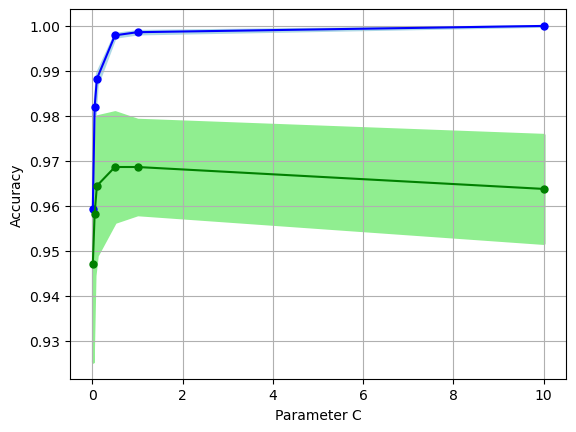

In [34]:
lw = 2
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.fill_between(
    param_range,
    train_mean - train_std,
    train_mean + train_std,
    color="lightblue",
    lw=lw,
)
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.fill_between(
    param_range,
    test_mean - test_std,
    test_mean + test_std,
    color="lightgreen",
    lw=lw,
)
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Como se puede ver los datos de testeo ,que son los que son aproximados, son los que tienen mayor error, este se vuelve constante bastante rapido. Por ultimo Vemos ahora una curva ROC.

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


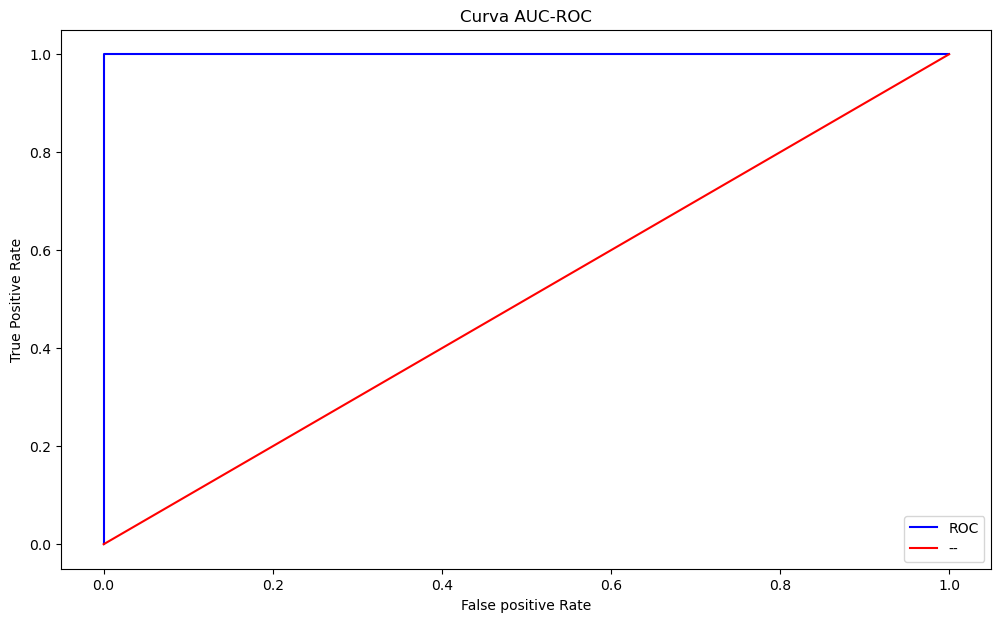

In [35]:
from sklearn.metrics import roc_curve

X = digits.drop(columns="target")
y = digits["target"].apply(lambda x: 1 if x==2 else 0)

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)

prob = model.predict_proba(X_test)
probs_tp = prob[:,1]
probs_tp

fpr, tpr, thresholds = roc_curve(y_test,probs_tp)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr,color="blue",label="ROC")
plt.plot([0,1],[0,1],color="red",label="--")
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva AUC-ROC")
plt.legend()
plt.show()

Por la curva podemos ver que es una modelo extremadamente bueno.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [36]:
## Me salte esto no me dio el tiempo

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [37]:


def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, y_train) # ajustando el modelo
    
    y_pred = list(model.predict(X_test))
    y_pred = np.array(y_pred)

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    counter = y_aux_pred.size
    flag = 1
    cont = 0
    for i in range(nx):
        for j in range(ny):
            cont = cont +1
            index = j + ny * i
            if cont >= counter:
                flag = 0
                break
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
        if flag == 0:
            break
    plt.show()



**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


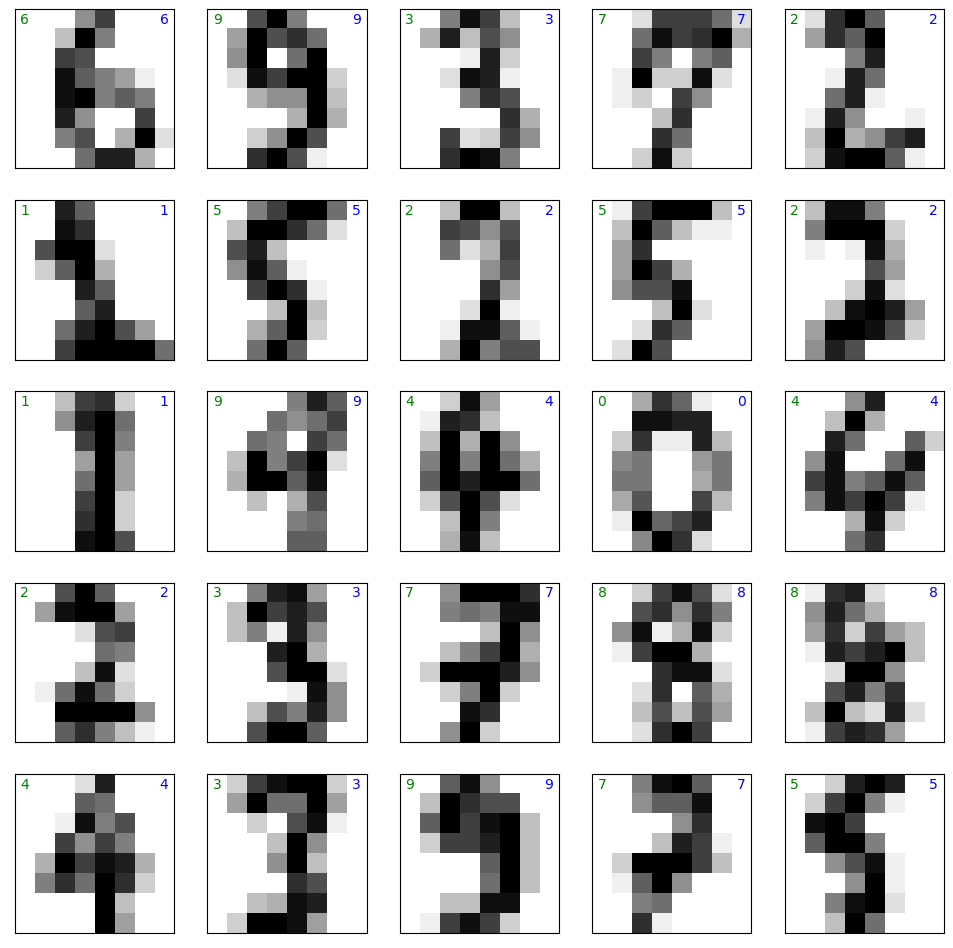

In [38]:
mostar_resultados(digits,LogisticRegression(),nx=5, ny=5,label = "correctos")

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


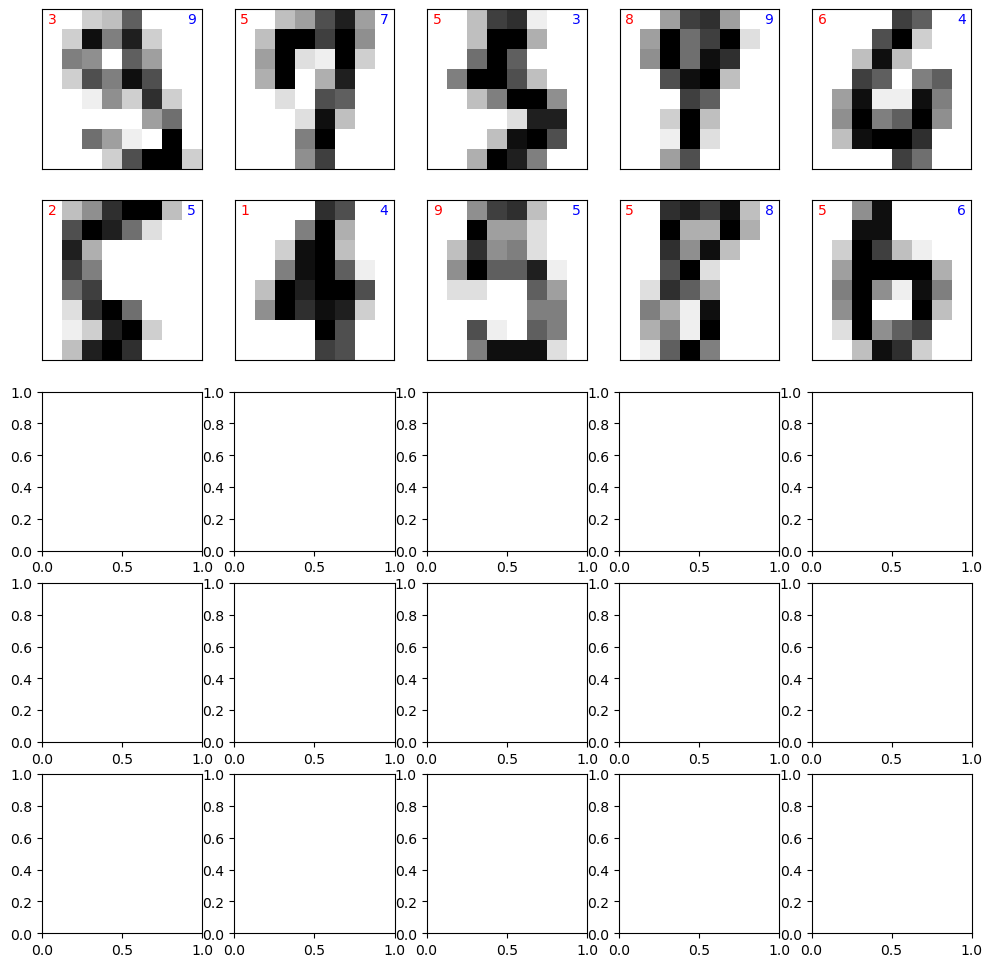

In [39]:
mostar_resultados(digits,LogisticRegression(),nx=5, ny=5,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Como se puede verl los aciertos llenaron los 25 espacios, esto porque son muchos. 
Por otra parte los incorrectos solo son 11, esto es una precision muy buena, dado que los datos del testeo son mas de 300.
Esto confirma lo que vimos antes, que la metrica de la regresion logica daba:
 	      Regresion logistica
accuracy      0.9694  	 	 
recall        0.9722
precision     0.9709
fscore        0.9714

Lo que es muy cercano a 0, lo cual concuerda con lo visto en el ejercicio 6.
Lo mas dificil fue hacer que las dimenciones de todo coincidieran, dado que tranajabamos con arrays que representan a imagenes, ademas la unica columna que daba informacion por si sola era la columna target.
Todo esto mas la curva ROC confirma que la regresion logica era una opcion acertada.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [40]:
housing = pd.read_csv('housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Primera Parte: Definicion del problema.

Queremos usar los datos dados en el dataframe para predecir el costo promedio de una casa. Todas las variables de cada casa son numeros o float, excepto por ocean_proximity que es un string o variable cualitativa. 
Se procedera a Visualizar y prepocesar la informacion. Empezaremos por ver las columnas, y ver cuantos datos tenemos.

In [41]:
housing.shape


(20640, 10)

Tenemos 10 variables en las 10 columnas, y mas de 20.000 datos , ademas hay 2 variables notables, una es el
median_house_value que es valor de una casa en particular y es lo que queremos modelar, y segundo el ocean_proximity que es un dato cualitativo y lo vamos a discretizar, veamos si se puede

In [42]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Le daremos valores numericos de 1 a 5. Ademas se puede ver que no hay datos innecesarios, si se quisiera se podria resummir los datos, pero es lo mismo, solo que son menos variables.

In [43]:

dic = {"NEAR BAY":1,
       "<1H OCEAN":2,
       "INLAND":3,
       "NEAR OCEAN":4,
       "ISLAND":5}
housing = housing.replace({"ocean_proximity":dic})
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


Segunda Parte: Estadistica descriptiva. Ahora usamos describe claramente

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.464729
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,3.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


Primero vemos las columnas por si solas, vemos los min y max, para saber si hay datos con valores outliers.
longitude y latitude estan en rangos correspondientes a su naturaleza.
housing_median_age esta entre 1 y 52 lo que es creible.
total_rooms puede ser un problema dado que el max es muy alto (39320), veremos la columna.
total_bedrooms tambien tiene cifras altas, lo veremos
population 	tambien tiene cifras altas, lo veremos
households 	tambien tiene cifras altas, lo veremos
median_income esta en un rango sensible
median_house_value esta en un rango sensible
ocean_proximity es como lo dejamos.

In [45]:
housing.sort_values("total_rooms").tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12201,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,2
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,2
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,2
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,2
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,3


Dejaremos las habitaciones que son menores a 1000

In [46]:
housing = housing[housing.total_rooms <= 1000]
housing.shape

(2328, 10)

In [47]:
housing.sort_values("total_bedrooms").tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19391,-120.85,37.78,25.0,421.0,NaN,303.0,106.0,2.2679,71300.0,3
19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,3
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,187500.0,3
19818,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,109100.0,3
20069,-120.37,38.01,30.0,473.0,NaN,242.0,93.0,2.5417,123200.0,3


In [48]:
housing = housing.dropna()
housing.sort_values("total_bedrooms").tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,1
4590,-118.28,34.06,52.0,936.0,454.0,990.0,354.0,1.1122,187500.0,2
14325,-117.16,32.72,52.0,788.0,463.0,805.0,391.0,0.9142,162500.0,4
4820,-118.30,34.05,39.0,993.0,506.0,1765.0,464.0,1.2786,121900.0,2
15660,-122.42,37.78,26.0,812.0,507.0,628.0,445.0,2.3304,500001.0,1


In [49]:
housing = housing[housing.total_bedrooms <= 250]
housing.shape

(2075, 10)

In [50]:
housing = housing[housing.population <= 5000]
housing.shape

(2071, 10)

In [51]:
housing.sort_values("households").tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13623,-117.27,34.12,52.0,954.0,246.0,943.0,256.0,0.8658,87500.0,3
16643,-120.65,35.32,20.0,626.0,212.0,3574.0,261.0,1.0298,300000.0,4
7285,-118.24,33.98,45.0,972.0,249.0,1288.0,261.0,2.2054,125000.0,2
18535,-122.01,36.97,52.0,920.0,202.0,525.0,264.0,2.9444,232800.0,4
1782,-122.36,37.94,27.0,844.0,249.0,583.0,265.0,0.9687,105800.0,1


In [52]:
housing = housing[housing.households <= 150]
housing.shape

(1282, 10)

Se puede ver que los datos con cifras grandes tambien tienen otros datos grandes, lo que indica que podrian ser edificios de departamento talvez, que comparten una direccion.

In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,-119.848799,36.099345,31.052262,451.672387,95.266771,286.381435,85.864275,3.614702,181902.390796,2.571763
std,2.075543,2.203416,13.381611,249.436990,49.227290,236.758385,43.537994,2.383070,119764.427327,0.825954
min,-124.150000,32.570000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.900000,34.020000,20.000000,250.750000,57.000000,143.250000,50.000000,2.093800,92850.000000,2.000000
50%,-119.840000,36.555000,33.000000,444.000000,102.000000,266.500000,90.000000,3.094050,150000.000000,3.000000
75%,-118.162500,37.870000,41.000000,644.750000,132.000000,380.000000,125.000000,4.451675,225000.000000,3.000000
max,-114.560000,41.500000,52.000000,994.000000,249.000000,4198.000000,150.000000,15.000100,500001.000000,4.000000


Despues comparamos las columnas, todas tienen 20640 datos, pero total_bedrooms tiene 20433, veamos que pasa.

In [54]:
print("La cantidad de vacios son")
len(housing["total_bedrooms"][housing["total_bedrooms"].isna()])

La cantidad de vacios son


0

Tercera parte: Visualizacion. Empezaremos viendo los datos mas faciles de graficar, estos son housing_median_age y ocean_proximity.

<AxesSubplot:>

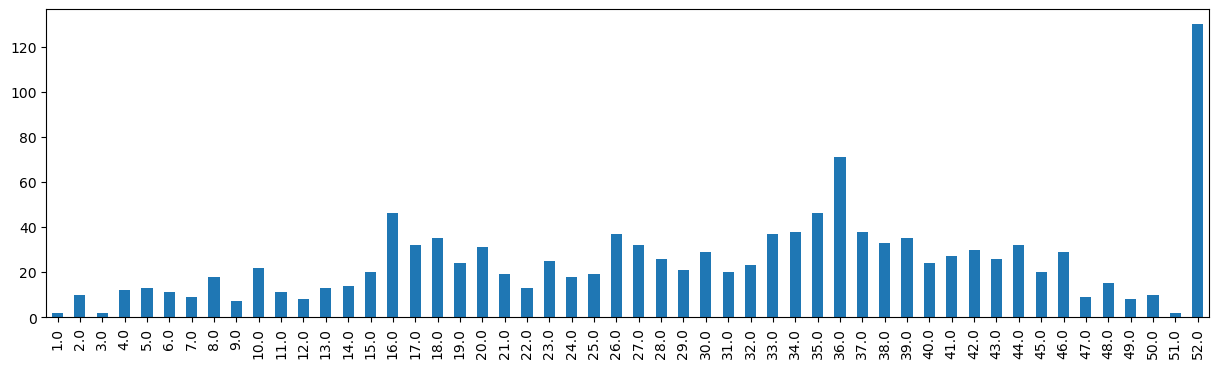

In [55]:
plt.style.use("default")
plt.figure(figsize=(15,4))

df_resum = pd.DataFrame(housing["housing_median_age"].unique())
df_resum = df_resum.sort_values(0)
df_resum = df_resum.apply(pd.to_numeric)
df_resum = df_resum.rename(columns={0:"order"})
housing.housing_median_age.value_counts().loc[list(df_resum["order"])].plot.bar()

Como se puede ver, se parece a una distribucion normal, pero hay una cantidad inusual de casas con 52 años, esto puede indicar un barrio particularmente viejo, lo borraremos para mejorar la prediccion.

<AxesSubplot:>

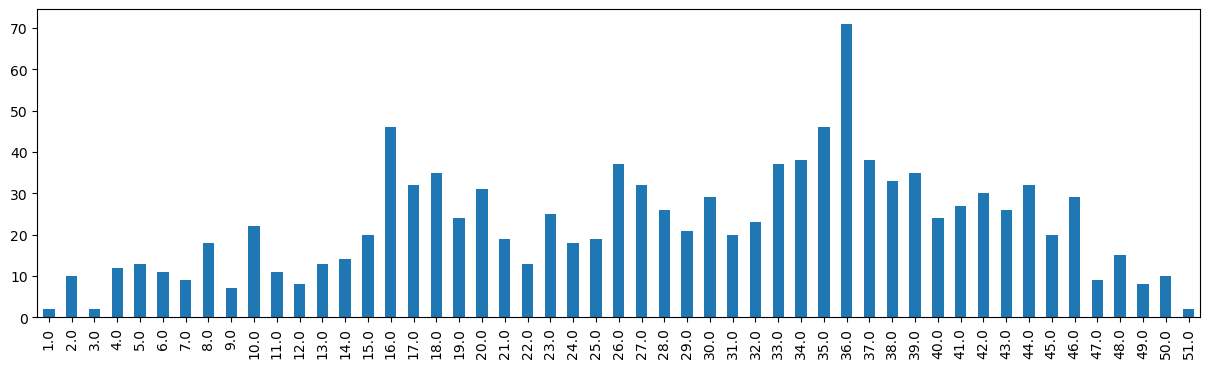

In [56]:
housing = housing[housing.housing_median_age != 52.0]
plt.style.use("default")
plt.figure(figsize=(15,4))

df_resum = pd.DataFrame(housing["housing_median_age"].unique())
df_resum = df_resum.sort_values(0)
df_resum = df_resum.apply(pd.to_numeric)
df_resum = df_resum.rename(columns={0:"order"})
housing.housing_median_age.value_counts().loc[list(df_resum["order"])].plot.bar()

Luego vemos el ocean_proximity.

In [57]:
housing["ocean_proximity"].unique()

array([1, 3, 2, 4])

Ya no hay 5.

La cuarta parte se hizo en los pasos anteriores. Y se seguira haciendo.

Quinta parte: empezaremos con los modelos anteriores.

In [58]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-119.780234,36.063672,28.688368,465.923611,96.973090,289.222222,87.191840,3.677212,182308.901910,2.605903
std,2.078919,2.222084,12.005759,247.973737,48.953729,229.383094,43.275195,2.329099,119211.490095,0.792603
min,-124.150000,32.570000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.830000,34.000000,19.000000,277.000000,59.750000,149.000000,52.000000,2.169550,93800.000000,2.000000
50%,-119.655000,36.150000,30.000000,461.000000,104.000000,268.500000,93.000000,3.156300,150850.000000,3.000000
75%,-118.130000,37.872500,38.000000,661.000000,134.000000,383.000000,127.000000,4.575400,225000.000000,3.000000
max,-114.560000,41.500000,51.000000,994.000000,249.000000,4198.000000,150.000000,15.000100,500001.000000,4.000000


Tambien sacaremos longitude y latitude porque no nos sirve para este ejemplo.

In [59]:
housing = housing.drop(columns="longitude")
housing = housing.drop(columns="latitude")
X = housing.drop(columns="median_house_value")
y = housing["median_house_value"]

X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,1
25,41.0,535.0,123.0,317.0,119.0,2.4038,1
59,2.0,158.0,43.0,94.0,57.0,2.5625,1
61,49.0,135.0,29.0,86.0,23.0,6.1183,1
62,50.0,760.0,190.0,377.0,122.0,0.9011,1
...,...,...,...,...,...,...,...
20617,20.0,561.0,109.0,308.0,114.0,3.3021,3
20620,40.0,198.0,41.0,151.0,48.0,4.5625,3
20625,37.0,102.0,17.0,29.0,14.0,4.1250,3
20627,5.0,358.0,65.0,169.0,59.0,3.0000,3


In [60]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [61]:
rlog = LogisticRegression()
rlog.fit(X_train,y_train)

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_true = list(y_test)
y_pred = list(rlog.predict(X_test))
df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_pred
    }
)
df_metrics = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metrics

Metricas para el regresor X con los arreglos correspondientes a los numeros.


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore
0,0.0376,0.0044,0.0013,0.0019


Bastante mala. Veamos otra.

In [63]:
X = housing.drop(columns="median_house_value")
y = housing["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
reg_knn = neighbors.KNeighborsRegressor(2,weights = "uniform")

reg_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [64]:
y_pred = list(reg_knn.predict(X_test))
y_true = list(y_test)
y_preds = [int(x) for x in y_pred]
df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)
df_temp
df_metrics_2 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors")]
df_metricas


Metricas para el regresor X con los arreglos correspondientes a los numeros.


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore,modelo
0,0.0376,0.0044,0.0013,0.0019,Regresion logistica
0,0.0029,0.0010,0.0019,0.0013,K-nearest-neighbors


Muy mala, veamos si GridSearch ayuda

In [65]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn_model = neighbors.KNeighborsRegressor()

search = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
}

GS = GridSearchCV(estimator=knn_model,
                  param_grid=search,
                  scoring = summary_metrics,
                  cv=5,
                  verbose=4
)
GS.fit(X_train, y_train)

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=3;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END .......................n_neighbors=4;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=4;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=5;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=5;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=5;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=5;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=5;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=6;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=6;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=6;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=6;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=6;, score=nan total time=   0.0s
[CV 1/5] END ...............

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END ......................n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END ......................n_neighbors=10;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=<function summary_metrics at 0x7f0327032310>, verbose=4)

In [66]:
print(GS.best_params_)

{'n_neighbors': 1}


In [67]:
X = housing.drop(columns="median_house_value")
y = housing["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
reg_knn = neighbors.KNeighborsRegressor(1,weights = "uniform")

reg_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [68]:
y_pred = list(reg_knn.predict(X_test))
y_true = list(y_test)
y_preds = [int(x) for x in y_pred]
df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)
df_temp
df_metrics_3 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("Knn = 1")]
df_metricas

Metricas para el regresor X con los arreglos correspondientes a los numeros.


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore,modelo
0,0.0376,0.0044,0.0013,0.0019,Regresion logistica
0,0.0029,0.0010,0.0019,0.0013,K-nearest-neighbors
0,0.0231,0.0045,0.0042,0.0043,Knn = 1


Mejor pero igual mala. Veamos la tercera.

In [69]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor(ccp_alpha = 0.1,max_depth = 1,min_samples_leaf = 1)

clf = clf.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(clf.predict(X_test))
y_preds = [int(x) for x in y_pred]

df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)

df_metrics_4 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3,df_metrics_4])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("n_neighbors = 1"),("DecisionTreeRegressor")]
df_metricas

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metricas para el regresor X con los arreglos correspondientes a los numeros.


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore,modelo
0,0.0376,0.0044,0.0013,0.0019,Regresion logistica
0,0.0029,0.0010,0.0019,0.0013,K-nearest-neighbors
0,0.0231,0.0045,0.0042,0.0043,n_neighbors = 1
0,0.0000,0.0000,0.0000,0.0000,DecisionTreeRegressor


In [70]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor()

search = {
    "max_depth": [1,2,3,6,9],
    "min_samples_split":[0.01,0.1,0.2,0.5,1,3,9],
    "min_weight_fraction_leaf":[0.0,0.1,0.5]
}

GS = GridSearchCV(estimator=clf,
                  param_grid=search,
                  scoring = summary_metrics,
                  cv=5,
                  verbose=4
)
GS.fit(X_train, y_train)

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=0.01, min_wei

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END max_depth=1, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but


[CV 4/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_d

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib

[CV 5/5] END max_depth=1, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_sampl

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 1/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END max_depth=2, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 4/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 5/5] END max_depth=2, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 3/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but


[CV 1/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s


/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 1/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but


[CV 3/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=3, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_sample

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(


[CV 3/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=9, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samp

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END max_depth=6, min_samples_split=0.01, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=0.01, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=0.01, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_split=0.01, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_split=0.01, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END m

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 5/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 2/5] END max_depth=6, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_split=0.5, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_split=1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(


[CV 5/5] END max_depth=6, min_samples_split=3, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=3, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=3, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=3, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_split=3, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_split=3, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=6, min_samples

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(


[CV 2/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.01, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] E

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(


[CV 5/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

[CV 5/5] END max_depth=9, min_samples_split=0.2, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=0.2, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=0.5, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_de

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 4/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=1, min_weight_fraction_leaf=0.5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=3, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but 3 were given

  warnings.warn(
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: summary_metrics() takes 1 positional argument but

[CV 1/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.0;, score=nan total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_split=9, min_weight_fraction_leaf=0.1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=9, min_samples

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 6, 9],
                         'min_samples_split': [0.01, 0.1, 0.2, 0.5, 1, 3, 9],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5]},
             scoring=<function summary_metrics at 0x7f0327032310>, verbose=4)

In [71]:
from sklearn.model_selection import GridSearchCV
print(GS.best_params_)

{'max_depth': 1, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0}


In [72]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = tree.DecisionTreeRegressor(min_samples_split = 0.01,max_depth = 1,min_weight_fraction_leaf = 0.0)

clf = clf.fit(X_train,y_train)

y_true = list(y_test)
y_pred = list(clf.predict(X_test))
y_preds = [int(x) for x in y_pred]

df_temp = pd.DataFrame(
    {
        "y":y_true,
        "yhat":y_preds
    }
)

df_metrics_5 = summary_metrics(df_temp)
print("Metricas para el regresor X con los arreglos correspondientes a los numeros.")
df_metricas =  pd.concat([df_metrics,df_metrics_2,df_metrics_3,df_metrics_4,df_metrics_5])
df_metricas["modelo"] = [("Regresion logistica"),("K-nearest-neighbors"),("n_neighbors = 1"),("DecisionTreeRegressor"),("newtree")]
df_metricas

/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ripvanfish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metricas para el regresor X con los arreglos correspondientes a los numeros.


,accuracy,recall,precision,fscore,modelo
0,0.0376,0.0044,0.0013,0.0019,Regresion logistica
0,0.0029,0.0010,0.0019,0.0013,K-nearest-neighbors
0,0.0231,0.0045,0.0042,0.0043,n_neighbors = 1
0,0.0000,0.0000,0.0000,0.0000,DecisionTreeRegressor
0,0.0000,0.0000,0.0000,0.0000,newtree


No pude ajustar el modelo